In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('student_performance.csv')

In [4]:
df.head()

,student_id,final_score,grade,pass_fail,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,parent_education_level,study_environment
0,S0001,60.137241,D,1,60.599707,61.488212,53.568119,64.972292,1.427203,75.738405,68.534371,6.809352,3.313096,65.059425,4.150025,6.104103,Master,Noisy
1,S0002,99.021977,A,1,92.289287,85.612565,91.873759,89.040461,4.813612,89.602736,91.990197,5.567793,4.925359,76.016617,8.714693,1.982358,High School,Quiet
2,S0003,70.522955,C,1,80.259667,82.160656,72.736065,74.243663,1.240908,81.495426,69.669666,6.702875,5.107888,113.616872,5.928220,4.463662,High School,Moderate
3,S0004,63.448537,D,1,72.926217,75.979145,76.726496,67.715995,2.190601,71.472047,71.976757,7.854439,3.772446,108.686690,4.224928,4.740474,High School,Noisy
4,S0005,66.483019,C,1,48.581025,51.379977,48.993224,46.145011,2.192265,64.276582,68.940591,7.662429,1.898989,42.107294,9.506815,1.143852,Master,Quiet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 1000 non-null   object 
 1   final_score                1000 non-null   float64
 2   grade                      1000 non-null   object 
 3   pass_fail                  1000 non-null   int64  
 4   previous_score             1000 non-null   float64
 5   math_prev_score            1000 non-null   float64
 6   science_prev_score         1000 non-null   float64
 7   language_prev_score        1000 non-null   float64
 8   daily_study_hours          1000 non-null   float64
 9   attendance_percentage      1000 non-null   float64
 10  homework_completion_rate   1000 non-null   float64
 11  sleep_hours                1000 non-null   float64
 12  screen_time_hours          1000 non-null   float64
 13  physical_activity_minutes  1000 non-null   float6

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.corr(numeric_only = True)['pass_fail']

final_score                  0.484865
pass_fail                    1.000000
previous_score               0.361246
math_prev_score              0.359795
science_prev_score           0.346924
language_prev_score          0.355748
daily_study_hours            0.189907
attendance_percentage        0.346079
homework_completion_rate     0.174031
sleep_hours                  0.020208
screen_time_hours           -0.013469
physical_activity_minutes   -0.039330
motivation_score             0.131215
exam_anxiety_score          -0.116647
Name: pass_fail, dtype: float64

In [11]:
df['parent_education_level'].unique()

array(['Master', 'High School', 'Bachelor'], dtype=object)

In [12]:
df['study_environment'].unique()

array(['Noisy', 'Quiet', 'Moderate'], dtype=object)

In [13]:
df['grade'].unique()

array(['D', 'A', 'C', 'F', 'B'], dtype=object)

In [15]:
df.drop('student_id' , axis=1 , inplace = True)

In [16]:
pel_map = {
    'High School' : 0,
    'Bachelor' : 1 ,
    'Master' : 2
}
df['parent_education_level_encoded'] = df['parent_education_level'].map(pel_map)
df.drop('parent_education_level' , axis=1 , inplace = True)

In [17]:
se_map = {
    'Noisy' : 0 ,
    'Moderate' : 1,
    'Quiet' : 2
}
df['study_environment_encoded'] = df['study_environment'].map(se_map)
df.drop('study_environment' , axis=1 , inplace=True)

In [18]:
grade_map = {
    'F' : 0,
    'D' :1,
    'C' : 2,
    'B' :3,
    'A' : 4
}

df['grade_encoded'] = df['grade'].map(grade_map)
df.drop('grade' , axis=1 , inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   final_score                     1000 non-null   float64
 1   pass_fail                       1000 non-null   int64  
 2   previous_score                  1000 non-null   float64
 3   math_prev_score                 1000 non-null   float64
 4   science_prev_score              1000 non-null   float64
 5   language_prev_score             1000 non-null   float64
 6   daily_study_hours               1000 non-null   float64
 7   attendance_percentage           1000 non-null   float64
 8   homework_completion_rate        1000 non-null   float64
 9   sleep_hours                     1000 non-null   float64
 10  screen_time_hours               1000 non-null   float64
 11  physical_activity_minutes       1000 non-null   float64
 12  motivation_score                100

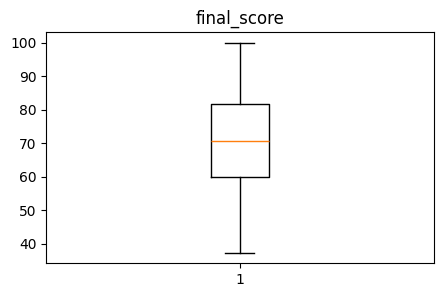

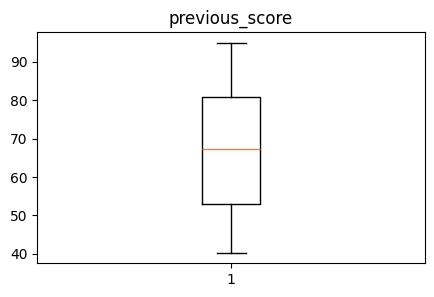

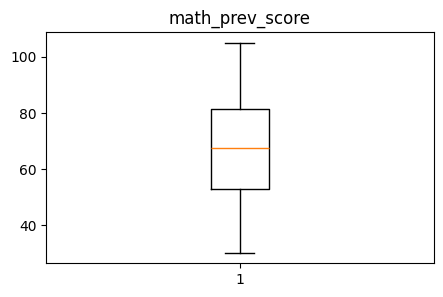

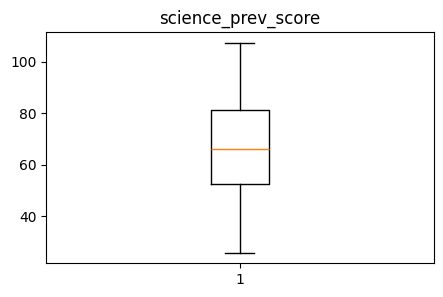

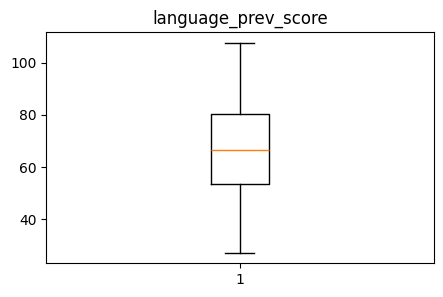

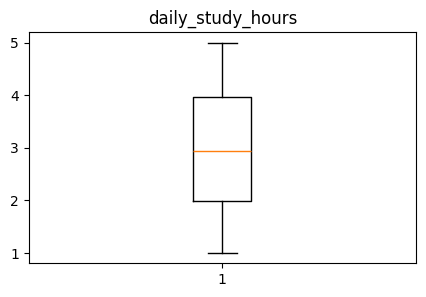

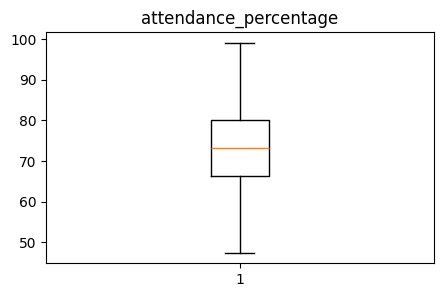

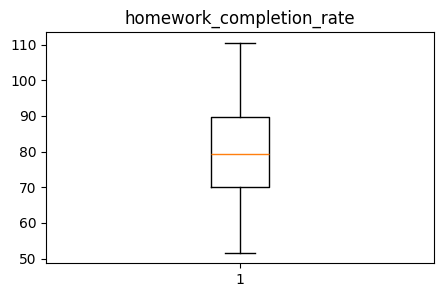

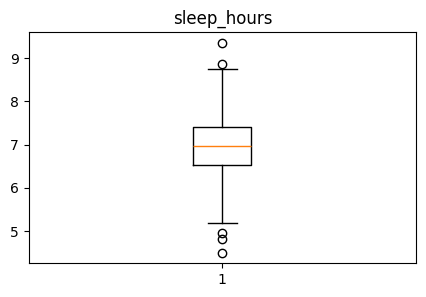

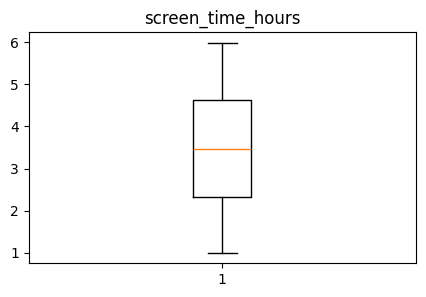

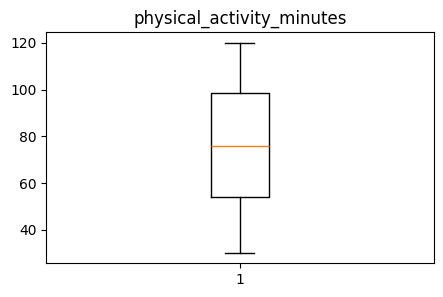

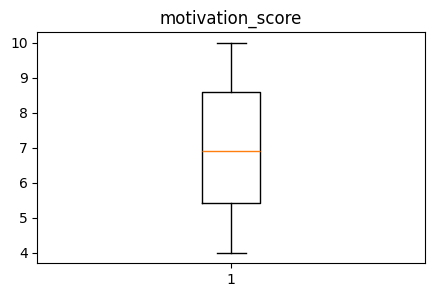

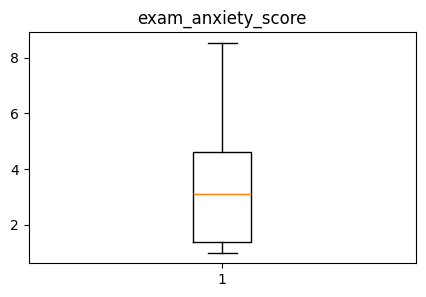

In [22]:
numeric_cols = df.select_dtypes(include=float).columns
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()


pass_fail
1    930
0     70
Name: count, dtype: int64


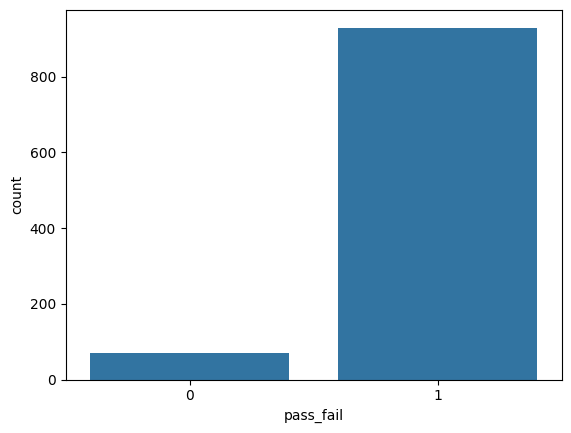

In [25]:
print(df['pass_fail'].value_counts())
sns.barplot(df['pass_fail'].value_counts())
plt.show()

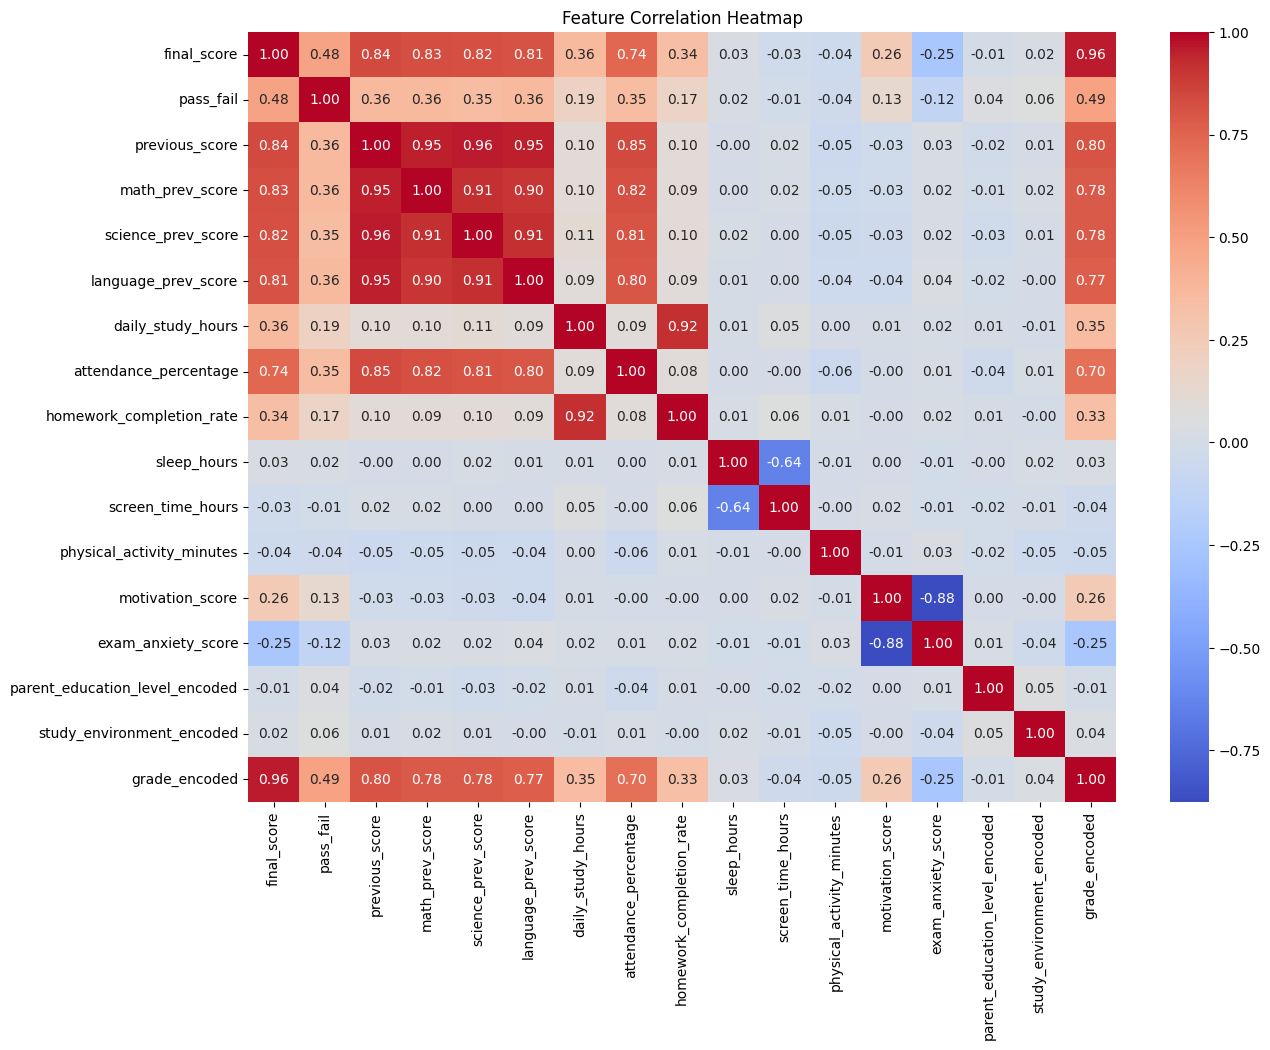

In [35]:
corr = df.corr()
plt.figure(figsize=(14,10)) 
sns.heatmap(
    corr,
    annot=True,      # show numbers
    fmt=".2f",       # 2 decimal
    cmap="coolwarm"
)

plt.title("Feature Correlation Heatmap")
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['pass_fail'])
y=df['pass_fail']

X_train ,X_test ,y_train , Y_test = train_test_split(x,y,test_size = 0.2 ,random_state=True)


In [71]:
def cap_outliers(train, test, cols):
    for col in cols:
        Q1 = train[col].quantile(0.25)
        Q3 = train[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        train[col] = train[col].clip(lower, upper)
        test[col]  = test[col].clip(lower, upper)

    return train, test

num_cols = X_train.select_dtypes(include='number').columns
X_train , X_test  = cap_outliers(X_train, X_test, num_cols)


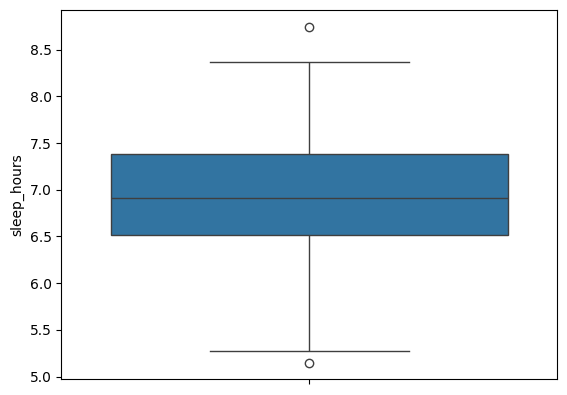

In [72]:
sns.boxplot(X_test['sleep_hours'])
plt.show()

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['float64']).columns
cat_cols = X_train.select_dtypes(include='int64').columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols)
])

X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)




# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

lr = LogisticRegression()
lr.fit(X_train ,y_train)

y_pred = lr.predict(X_test)
print(f'accuracy : {accuracy_score(Y_test ,y_pred)}')
print(f'confusion matrix :\n {confusion_matrix(Y_test ,y_pred)}')
print(f'classification Report :\n {classification_report(Y_test ,y_pred)}')


accuracy : 0.985
confusion matrix :
 [[  6   2]
 [  1 191]]
classification Report :
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.99      0.99      0.99       192

    accuracy                           0.98       200
   macro avg       0.92      0.87      0.90       200
weighted avg       0.98      0.98      0.98       200

